# EBAC - Regressão II - regressão múltipla

## Tarefa II

## Índice <a name="topo"></a>

1. [1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento)](#1)
2. [2. Rode uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o  𝑅2 na base de testes. Qual o melhor modelo?](#2)
3. [3. Faça o mesmo que no passo 2, com uma regressão LASSO. Qual método chega a um melhor resultado?](#3)
4. [4. Rode um modelo stepwise. Avalie o  𝑅2 na base de testes. Qual o melhor resultado?
](#4)
5. [5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?](#5)
6. [6. Partindo dos modelos que você ajustou, tente melhorar o  𝑅2 na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.](#6)
7. [Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela](#7) 

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
df.columns # comando simples para verificar as variáveis

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [6]:
# excluindo as variáveis irrelevantes para o modelo
df =  df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [7]:
#verificando NAs
df.isna().sum()
# há 2573 exclusivamente na variável tempo_emprego o que corresponde a 17%. é muita coisa
# mesmo assim, optei por remove-los para homogeneizar a base e reduzir o tamanho

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [8]:
2573/15000 # percentual de NA na variável tempo_emprego

0.17153333333333334

In [9]:
# removendo NAs
df = df.dropna()
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [10]:
# criando a lista com todas as variáveis separadas por +. Copiar a saída e colar no modelo
x = df.columns.to_list()
x.pop(-1) # removendo a variável renda 
x = ' + '.join(x)
x

'sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).<a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [130]:
# criando a designe matrix e separando a variável resposta

y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', df)
# após usar o patsy, para fazer a separação de X e y, quando rodada a regressão, as variáveis perdem seu nome na .summary()

# y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda, Treatment(3)) + C(educacao, Treatment(1)) + C(estado_civil, Treatment(3)) + C(tipo_residencia, Treatment(2)) + idade + tempo_emprego + qt_pessoas_residencia', df)
# fiquei em dúvida se deveria usar essa linha com as transformações já da última atividade

In [131]:
# separando entre treino e test X e y criados anteriormente
# 25% para teste e 75% para treino
# usando o random state para garantir que os resultados seam sempre os mesmos em futuras análises.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

### 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo? <a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [134]:
# regulatização ridge alpha = 0
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     54.56
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.70e-223
Time:                        16:20:51   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.320e+04
Df Residuals:                    3082   BIC:                         6.335e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9054.670      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.821     21.572      0.000    5056.303    6067.339
var_2        604.3954    250.965      2.408      0.016     112.320    1096.471
var_3        376.6470    243.051      1.550      0.121     -99.911     853.205
var_4         4.4e-12   1.38e-11      0.320      0.749   -2.26e-11    3.14e-11
var_5        657.1774    257.261      2.555      0.011     152.756    1161.599
var_6      -2475.3465   4461.592     -0.555      0.579   -1.12e+04    6272.648
var_7        230.2674    393.048      0.586      0.558    -540.396    1000.930
var_8       1795.1343   2354.568      0.762      0.446   -2821.546    6411.815
var_9        278.5882   1252.307      0.222      0.824   -2176.853    2734.029
var_10      1117.7262   1258.501      0.888      0.375   -1349.859    3585.311
var_11        -1.9219   1352.914     -0.001      0.999   -2654.626    2650.783
var_12     -3268.8018   4497.473     -0.727      0.467   -1.21e+04    5549.546
var_13     -3760.2472   4461.073     -0.843      0.399   -1.25e+04    4986.730
var_14      -316.9330    454.643     -0.697      0.486   -1208.367     574.501
var_15     -3535.8654   4528.352     -0.781      0.435   -1.24e+04    5343.028
var_16       144.6635    883.007      0.164      0.870   -1586.678    1876.005
var_17      -192.6898    994.809     -0.194      0.846   -2143.245    1757.865
var_18       -30.1219   1583.004     -0.019      0.985   -3133.972    3073.728
var_19      3459.1847   1803.261      1.918      0.055     -76.531    6994.900
var_20       858.6414   1101.198      0.780      0.436   -1300.515    3017.798
var_21      3414.9948   4474.770      0.763      0.445   -5358.839    1.22e+04
var_22        48.6602     14.035      3.467      0.001      21.141      76.179
var_23       503.7494     18.497     27.234      0.000     467.481     540.017
var_24     -3199.2397   4472.622     -0.715      0.474    -1.2e+04    5570.383
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [135]:
# regulatização ridge alpha = 0.001
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.001)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:21:07   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
# regulatização ridge alpha = 0.005
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.005)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:21:18   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [137]:
# regulatização ridge alpha = 0.01
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.01)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:21:24   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [138]:
# regulatização ridge alpha = 0.05
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.05)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:21:33   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [139]:
# regulatização ridge alpha = 0.1
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.01 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.1)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:21:43   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Após rodar o mesmo modelo alterando o alpha como solicitado, não foi observada nenhuma alteração no R-quadrado.

### 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado? <a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [140]:
# regulatização ridge alpha = 0
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\base\elastic_net.py:337: RuntimeWarning: invalid value encountered in double_scalars
  h = (L1_wt - b) / c
C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     54.56
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.70e-223
Time:                        16:21:59   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.320e+04
Df Residuals:                    3082   BIC:                         6.335e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9054.670      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.821     21.572      0.000    5056.303    6067.339
var_2        604.3954    250.965      2.408      0.016     112.320    1096.471
var_3        376.6470    243.051      1.550      0.121     -99.911     853.205
var_4         4.4e-12   1.38e-11      0.320      0.749   -2.26e-11    3.14e-11
var_5        657.1774    257.261      2.555      0.011     152.756    1161.599
var_6      -2475.3465   4461.592     -0.555      0.579   -1.12e+04    6272.648
var_7        230.2674    393.048      0.586      0.558    -540.396    1000.930
var_8       1795.1343   2354.568      0.762      0.446   -2821.546    6411.815
var_9        278.5882   1252.307      0.222      0.824   -2176.853    2734.029
var_10      1117.7262   1258.501      0.888      0.375   -1349.859    3585.311
var_11        -1.9219   1352.914     -0.001      0.999   -2654.626    2650.783
var_12     -3268.8018   4497.473     -0.727      0.467   -1.21e+04    5549.546
var_13     -3760.2472   4461.073     -0.843      0.399   -1.25e+04    4986.730
var_14      -316.9330    454.643     -0.697      0.486   -1208.367     574.501
var_15     -3535.8654   4528.352     -0.781      0.435   -1.24e+04    5343.028
var_16       144.6635    883.007      0.164      0.870   -1586.678    1876.005
var_17      -192.6898    994.809     -0.194      0.846   -2143.245    1757.865
var_18       -30.1219   1583.004     -0.019      0.985   -3133.972    3073.728
var_19      3459.1847   1803.261      1.918      0.055     -76.531    6994.900
var_20       858.6414   1101.198      0.780      0.436   -1300.515    3017.798
var_21      3414.9948   4474.770      0.763      0.445   -5358.839    1.22e+04
var_22        48.6602     14.035      3.467      0.001      21.141      76.179
var_23       503.7494     18.497     27.234      0.000     467.481     540.017
var_24     -3199.2397   4472.622     -0.715      0.474    -1.2e+04    5570.383
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [141]:
# regulatização ridge alpha = 0.001
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.001)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:22:05   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [142]:
# regulatização ridge alpha = 0.005
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.005)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:22:11   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [143]:
# regulatização ridge alpha = 0.01
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.01)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.54e-224
Time:                        16:22:41   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3083   BIC:                         6.335e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3077.2744   9053.202      0.340      0.734   -1.47e+04    2.08e+04
var_1       5561.8213    257.779     21.576      0.000    5056.385    6067.257
var_2        604.3954    250.924      2.409      0.016     112.399    1096.391
var_3        376.6470    243.011      1.550      0.121     -99.833     853.127
var_4               0          0        nan        nan           0           0
var_5        657.1774    257.220      2.555      0.011     152.838    1161.517
var_6      -2475.3465   4460.868     -0.555      0.579   -1.12e+04    6271.228
var_7        230.2674    392.984      0.586      0.558    -540.270    1000.805
var_8       1795.1343   2354.186      0.763      0.446   -2820.797    6411.066
var_9        278.5882   1252.104      0.222      0.824   -2176.454    2733.631
var_10      1117.7262   1258.296      0.888      0.374   -1349.458    3584.911
var_11        -1.9219   1352.695     -0.001      0.999   -2654.196    2650.352
var_12     -3268.8018   4496.744     -0.727      0.467   -1.21e+04    5548.115
var_13     -3760.2472   4460.349     -0.843      0.399   -1.25e+04    4985.311
var_14      -316.9330    454.569     -0.697      0.486   -1208.223     574.357
var_15     -3535.8654   4527.618     -0.781      0.435   -1.24e+04    5341.587
var_16       144.6635    882.864      0.164      0.870   -1586.397    1875.724
var_17      -192.6898    994.647     -0.194      0.846   -2142.928    1757.549
var_18       -30.1219   1582.747     -0.019      0.985   -3133.468    3073.224
var_19      3459.1847   1802.969      1.919      0.055     -75.957    6994.326
var_20       858.6414   1101.019      0.780      0.436   -1300.165    3017.447
var_21      3414.9948   4474.044      0.763      0.445   -5357.414    1.22e+04
var_22        48.6602     14.033      3.468      0.001      21.146      76.175
var_23       503.7494     18.494     27.238      0.000     467.487     540.012
var_24     -3199.2397   4471.897     -0.715      0.474    -1.2e+04    5568.959
==============================================================================
Omnibus:                     2750.801   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.479
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [144]:
# regulatização ridge alpha = 0.05
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.05)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     59.34
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.55e-225
Time:                        16:22:49   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3084   BIC:                         6.334e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3069.0772   9041.484      0.339      0.734   -1.47e+04    2.08e+04
var_1       5561.9742    257.612     21.591      0.000    5056.866    6067.083
var_2        604.2647    250.790      2.409      0.016     112.533    1095.997
var_3        376.5414    242.908      1.550      0.121     -99.737     852.820
var_4               0          0        nan        nan           0           0
var_5        657.2723    257.130      2.556      0.011     153.110    1161.435
var_6      -2475.2419   4460.141     -0.555      0.579   -1.12e+04    6269.907
var_7        230.1295    392.854      0.586      0.558    -540.152    1000.411
var_8       1795.1505   2353.804      0.763      0.446   -2820.032    6410.333
var_9        278.7860   1251.858      0.223      0.824   -2175.774    2733.346
var_10      1117.5261   1258.049      0.888      0.374   -1349.172    3584.224
var_11        -1.8158   1352.464     -0.001      0.999   -2653.637    2650.005
var_12     -3269.1347   4495.981     -0.727      0.467   -1.21e+04    5546.285
var_13     -3760.2469   4459.627     -0.843      0.399   -1.25e+04    4983.892
var_14      -316.8243    454.460     -0.697      0.486   -1207.899     574.250
var_15     -3536.3634   4526.808     -0.781      0.435   -1.24e+04    5339.501
var_16       153.8601    738.752      0.208      0.835   -1294.636    1602.356
var_17      -183.5755    871.620     -0.211      0.833   -1892.590    1525.439
var_18              0          0        nan        nan           0           0
var_19      3468.4526   1735.675      1.998      0.046      65.256    6871.649
var_20       867.7913    990.343      0.876      0.381   -1074.008    2809.590
var_21      3415.3268   4473.285      0.763      0.445   -5355.593    1.22e+04
var_22        48.6494     14.019      3.470      0.001      21.162      76.137
var_23       503.7540     18.490     27.245      0.000     467.501     540.007
var_24     -3199.5550   4471.141     -0.716      0.474    -1.2e+04    5567.162
==============================================================================
Omnibus:                     2750.803   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.511
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [145]:
# regulatização ridge alpha = 0.1
md = sm.OLS(y_test, X_test)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0.
                         , alpha = 0.1)
reg.summary()

C:\Users\khrik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     59.34
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.55e-225
Time:                        16:22:55   Log-Likelihood:                -31572.
No. Observations:                3107   AIC:                         6.319e+04
Df Residuals:                    3084   BIC:                         6.334e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0       3069.0772   9041.484      0.339      0.734   -1.47e+04    2.08e+04
var_1       5561.9742    257.612     21.591      0.000    5056.866    6067.083
var_2        604.2647    250.790      2.409      0.016     112.533    1095.997
var_3        376.5414    242.908      1.550      0.121     -99.737     852.820
var_4               0          0        nan        nan           0           0
var_5        657.2723    257.130      2.556      0.011     153.110    1161.435
var_6      -2475.2419   4460.141     -0.555      0.579   -1.12e+04    6269.907
var_7        230.1295    392.854      0.586      0.558    -540.152    1000.411
var_8       1795.1505   2353.804      0.763      0.446   -2820.032    6410.333
var_9        278.7860   1251.858      0.223      0.824   -2175.774    2733.346
var_10      1117.5261   1258.049      0.888      0.374   -1349.172    3584.224
var_11        -1.8158   1352.464     -0.001      0.999   -2653.637    2650.005
var_12     -3269.1347   4495.981     -0.727      0.467   -1.21e+04    5546.285
var_13     -3760.2469   4459.627     -0.843      0.399   -1.25e+04    4983.892
var_14      -316.8243    454.460     -0.697      0.486   -1207.899     574.250
var_15     -3536.3634   4526.808     -0.781      0.435   -1.24e+04    5339.501
var_16       153.8601    738.752      0.208      0.835   -1294.636    1602.356
var_17      -183.5755    871.620     -0.211      0.833   -1892.590    1525.439
var_18              0          0        nan        nan           0           0
var_19      3468.4526   1735.675      1.998      0.046      65.256    6871.649
var_20       867.7913    990.343      0.876      0.381   -1074.008    2809.590
var_21      3415.3268   4473.285      0.763      0.445   -5355.593    1.22e+04
var_22        48.6494     14.019      3.470      0.001      21.162      76.137
var_23       503.7540     18.490     27.245      0.000     467.501     540.007
var_24     -3199.5550   4471.141     -0.716      0.474    -1.2e+04    5567.162
==============================================================================
Omnibus:                     2750.803   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142627.511
Skew:                           3.998   Prob(JB):                         0.00
Kurtosis:                      35.214   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -7.33e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Após rodar o mesmo modelo com a regularização lasso e alterando o alpha como solicitado, somente as variações de alpha 0.05 e 0.1 apresentaram alguma piora no R-quadrado, mas nada muito significativo.

### 4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?<a name="4"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [22]:
# para conseguir rodar o stepwise, é necessário usar essa estratégia para separação entre X e y
y = df.renda
X = df.drop('renda', axis = 1)

In [23]:
# o algoritmo stepwise não aceita object pois não converte em dummies
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  bool   
 1   posse_de_imovel                12427 non-null  bool   
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   sexo_M                         12427 non-null  uint8  
 7   tipo_renda_Bolsista            12427 non-null  uint8  
 8   tipo_renda_Empresário          12427 non-null  uint8  
 9   tipo_renda_Pensionista         12427 non-null  uint8  
 10  tipo_renda_Servidor público    12427 non-null  uint8  
 11  educacao_Pós graduação         12427 non-null  uint8  
 12  educacao_Secundário            12427 non-null 

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# o algorítmo stepwise não conseguiu rodar as variáveis booleanas, logo, as transformei em int

X = X.replace({'posse_de_veiculo': {True : 1, False : 0}, 'posse_de_imovel': {True : 1, False : 0}})
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  int64  
 1   posse_de_imovel                12427 non-null  int64  
 2   qtd_filhos                     12427 non-null  int64  
 3   idade                          12427 non-null  int64  
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   sexo_M                         12427 non-null  uint8  
 7   tipo_renda_Bolsista            12427 non-null  uint8  
 8   tipo_renda_Empresário          12427 non-null  uint8  
 9   tipo_renda_Pensionista         12427 non-null  uint8  
 10  tipo_renda_Servidor público    12427 non-null  uint8  
 11  educacao_Pós graduação         12427 non-null  uint8  
 12  educacao_Secundário            12427 non-null 

In [25]:
# separando entre teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 14812 to 9495
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               3107 non-null   int64  
 1   posse_de_imovel                3107 non-null   int64  
 2   qtd_filhos                     3107 non-null   int64  
 3   idade                          3107 non-null   int64  
 4   tempo_emprego                  3107 non-null   float64
 5   qt_pessoas_residencia          3107 non-null   float64
 6   sexo_M                         3107 non-null   uint8  
 7   tipo_renda_Bolsista            3107 non-null   uint8  
 8   tipo_renda_Empresário          3107 non-null   uint8  
 9   tipo_renda_Pensionista         3107 non-null   uint8  
 10  tipo_renda_Servidor público    3107 non-null   uint8  
 11  educacao_Pós graduação         3107 non-null   uint8  
 12  educacao_Secundário            3107 non-null

In [27]:
# rodando o algorítimo que cria o método stepwise_selection
import pandas as pd
import numpy as np
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [28]:
# rodando o stepwise

variaveis = stepwise_selection(X_test, y_test, )

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 8.47062e-122
#############
['tempo_emprego']
Add  sexo_M                         with p-value 8.19909e-117
#############
['tempo_emprego', 'sexo_M']
Add  educacao_Superior completo     with p-value 0.000226477
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo']
Add  idade                          with p-value 0.000382414
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'idade']
Add  posse_de_veiculo               with p-value 0.00320998
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'idade', 'posse_de_veiculo']
Add  tipo_renda_Empresário          with p-value 0.0138968
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'idade', 'posse_de_veiculo', 'tipo_renda_Empresário']
Add  qt_pessoas_residencia          with p-value 0.0203004
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior completo', 'idade', 'posse_de_veiculo', 'tipo_renda_Empresári

In [156]:
# rodando a regressão com o stepwise

reg_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.92e-238
Time:                        16:38:02   Log-Likelihood:                -31576.
No. Observations:                3107   AIC:                         6.317e+04
Df Residuals:                    3098   BIC:                         6.323e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3578.5793    682.557     -5.243      0.000   -4916.889   -2240.270
tempo_emprego                504.4797     18.316     27.543      0.000     468.567     540.393
sexo_M                      5525.3393    255.020     21.666      0.000    5025.314    6025.365
educacao_Superior completo   853.2032    236.139      3.613      0.000     390.198    1316.209
idade                         55.6753     13.247      4.203      0.000      29.701      81.649
posse_de_veiculo             637.2925    247.788      2.572      0.010     151.447    1123.138
tipo_renda_Empresário        644.7148    250.050      2.578      0.010     154.435    1134.995
qt_pessoas_residencia        279.9288    119.202      2.348      0.019      46.206     513.651
tipo_residencia_Estúdio     3316.9610   1579.504      2.100      0.036     219.980    6413.942
==============================================================================
Omnibus:                     2755.005   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143156.424
Skew:                           4.008   Prob(JB):                         0.00
Kurtosis:                      35.273   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Após inúmeras tentativas e alternativas para garatir que o método de stepwise rodasse, o resultado foi frustrante rsrsrs.
- O modelo stepwise não apresentou valor de R-quadrado superior ao das regularizações ridge ou lasso

### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?<a name="5"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

Como esperado, o R-quadrado diminuiu, devido a redução de variáveis no modelo (de ``307`` para ``305``).

Mas o R-quadrado ajustado, apresentou um ``303``, o que superior aos demais modelos.

Bem como o AIC apresentou um valor inferior ``6.317e+04``.

Com base nos parâmetros observados, indica-se que a seleção destas variáveis levou a um modelo mais eficiente e melhor.

### 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis. <a name="6"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [167]:
# usando o último modelo e sua seleção de variáveis
# testando regularização lasso com as variações do alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1 ,0.9]

md_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis])))
reg_stepwise2 = md_stepwise.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0, logo, quando 0.1 = ridge
                         , alpha = 0.1)
reg_stepwise2.summary()

# nenhum valor de alpha apresentou mudança nos parâmetros

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.28e-237
Time:                        17:10:01   Log-Likelihood:                -31576.
No. Observations:                3107   AIC:                         6.317e+04
Df Residuals:                    3098   BIC:                         6.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3578.5793    682.557     -5.243      0.000   -4916.889   -2240.270
tempo_emprego                504.4797     18.316     27.543      0.000     468.567     540.393
sexo_M                      5525.3393    255.020     21.666      0.000    5025.314    6025.365
educacao_Superior completo   853.2032    236.139      3.613      0.000     390.198    1316.209
idade                         55.6753     13.247      4.203      0.000      29.701      81.649
posse_de_veiculo             637.2925    247.788      2.572      0.010     151.447    1123.138
tipo_renda_Empresário        644.7148    250.050      2.578      0.010     154.435    1134.995
qt_pessoas_residencia        279.9288    119.202      2.348      0.019      46.206     513.651
tipo_residencia_Estúdio     3316.9610   1579.504      2.100      0.036     219.980    6413.942
==============================================================================
Omnibus:                     2755.005   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143156.424
Skew:                           4.008   Prob(JB):                         0.00
Kurtosis:                      35.273   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# usando o último modelo e sua seleção de variáveis
# testando regularização ridge com as variações do alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]

md_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis])))
reg_stepwise3 = md_stepwise.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0, logo, quando 0.1 = ridge
                         , alpha = 0.9)
reg_stepwise3.summary()

# nenhum valor de alpha apresentou mudança nos parâmetros

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.28e-237
Time:                        17:11:37   Log-Likelihood:                -31576.
No. Observations:                3107   AIC:                         6.317e+04
Df Residuals:                    3098   BIC:                         6.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3578.5793    682.557     -5.243      0.000   -4916.889   -2240.270
tempo_emprego                504.4797     18.316     27.543      0.000     468.567     540.393
sexo_M                      5525.3393    255.020     21.666      0.000    5025.314    6025.365
educacao_Superior completo   853.2032    236.139      3.613      0.000     390.198    1316.209
idade                         55.6753     13.247      4.203      0.000      29.701      81.649
posse_de_veiculo             637.2925    247.788      2.572      0.010     151.447    1123.138
tipo_renda_Empresário        644.7148    250.050      2.578      0.010     154.435    1134.995
qt_pessoas_residencia        279.9288    119.202      2.348      0.019      46.206     513.651
tipo_residencia_Estúdio     3316.9610   1579.504      2.100      0.036     219.980    6413.942
==============================================================================
Omnibus:                     2755.005   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143156.424
Skew:                           4.008   Prob(JB):                         0.00
Kurtosis:                      35.273   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# usando o último modelo e sua seleção de variáveis
# testando regularização variando o L1 com as variações do alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]

md_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis])))
reg_stepwise3 = md_stepwise.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.5 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0, logo, quando 0.1 = ridge
                         , alpha = 0.001)
reg_stepwise3.summary()

# nenhuma outra alteração de parâmetros alterando o L1_wt com as alterações de alpha também

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.28e-237
Time:                        17:16:26   Log-Likelihood:                -31576.
No. Observations:                3107   AIC:                         6.317e+04
Df Residuals:                    3098   BIC:                         6.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3578.5793    682.557     -5.243      0.000   -4916.889   -2240.270
tempo_emprego                504.4797     18.316     27.543      0.000     468.567     540.393
sexo_M                      5525.3393    255.020     21.666      0.000    5025.314    6025.365
educacao_Superior completo   853.2032    236.139      3.613      0.000     390.198    1316.209
idade                         55.6753     13.247      4.203      0.000      29.701      81.649
posse_de_veiculo             637.2925    247.788      2.572      0.010     151.447    1123.138
tipo_renda_Empresário        644.7148    250.050      2.578      0.010     154.435    1134.995
qt_pessoas_residencia        279.9288    119.202      2.348      0.019      46.206     513.651
tipo_residencia_Estúdio     3316.9610   1579.504      2.100      0.036     219.980    6413.942
==============================================================================
Omnibus:                     2755.005   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143156.424
Skew:                           4.008   Prob(JB):                         0.00
Kurtosis:                      35.273   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# transformando a variável 'tempo_emprego' com as estratégias log, power e exp

X_test['tempo_emprego_power'] = np.power(X_test['tempo_emprego'], 2)
X_test.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,tempo_emprego_log,tempo_emprego_exp,tempo_emprego_power
14812,1,1,0,29,1.306849,2.0,1,0,0,0,...,1,0,1,0,0,0,0,0.267619,3.694515,1.707855
11591,0,0,0,26,0.600000,1.0,1,0,1,0,...,0,0,1,0,0,0,0,-0.510826,1.822119,0.360000
13436,1,1,1,46,1.115068,3.0,0,0,0,0,...,0,0,1,0,0,0,0,0.108916,3.049777,1.243378
14948,1,0,1,37,3.542466,3.0,1,0,0,0,...,0,0,1,0,0,0,0,1.264823,34.552011,12.549064
14509,0,0,1,36,6.717808,2.0,0,0,1,0,...,0,0,1,0,0,0,0,1.904762,827.002914,45.128947


In [229]:
# adicionando e removendo as variáveis da lista variaveis que identifica em Xtest quais colunas buscar

#variaveis.append('tempo_emprego')
variaveis.remove('tempo_emprego')
variaveis

['educacao_Superior completo',
 'idade',
 'posse_de_veiculo',
 'tipo_renda_Empresário',
 'qt_pessoas_residencia',
 'tipo_residencia_Estúdio',
 'sexo_M',
 'tempo_emprego']

In [219]:
md_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis])))
reg_stepwise4 = md_stepwise.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0, logo, quando 0.1 = ridge
                         , alpha = 0.001) # apliquei variações do alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]
reg_stepwise4.summary()

# aplicando power em 'tempo_emprego' todos os parâmetros pioraram
# aplicando log em 'tempo_emprego' todos os parâmetros pioraram
# aplicando exp em 'tempo_emprego' todos os parâmetros pioraram ainda mais

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     139.4
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.99e-221
Time:                        21:15:25   Log-Likelihood:                -31613.
No. Observations:                3107   AIC:                         6.325e+04
Df Residuals:                    3098   BIC:                         6.331e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1895.7725    694.926     -2.728      0.006   -3258.335    -533.210
educacao_Superior completo   775.1381    239.061      3.242      0.001     306.404    1243.872
idade                         62.8693     13.386      4.697      0.000      36.623      89.115
posse_de_veiculo             691.9654    250.905      2.758      0.006     200.008    1183.923
tipo_renda_Empresário        596.4907    252.987      2.358      0.018     100.452    1092.529
qt_pessoas_residencia        351.8661    120.569      2.918      0.004     115.464     588.268
tipo_residencia_Estúdio     3767.4247   1598.370      2.357      0.018     633.452    6901.397
sexo_M                      5458.9885    257.967     21.162      0.000    4953.185    5964.792
tempo_emprego_power           17.2239      0.667     25.840      0.000      15.917      18.531
==============================================================================
Omnibus:                     2732.004   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141379.116
Skew:                           3.954   Prob(JB):                         0.00
Kurtosis:                      35.087   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
# apagando as colunas transformadas
X_test = X_test.drop(['tempo_emprego_power','tempo_emprego_log', 'tempo_emprego_exp'], axis = 1)
X_test.head(5)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
14812,1,1,0,29,1.306849,2.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11591,0,0,0,26,0.600000,1.0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
13436,1,1,1,46,1.115068,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14948,1,0,1,37,3.542466,3.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14509,0,0,1,36,6.717808,2.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [223]:
X_test.qt_pessoas_residencia.value_counts()

2.0     1590
3.0      648
1.0      498
4.0      320
5.0       42
6.0        4
9.0        3
15.0       2
Name: qt_pessoas_residencia, dtype: int64

In [224]:
X_test['qt_pessoas_residencia'] = np.log(X_test['qt_pessoas_residencia'])
X_test.head(5)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
14812,1,1,0,29,1.306849,0.693147,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11591,0,0,0,26,0.600000,0.000000,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
13436,1,1,1,46,1.115068,1.098612,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14948,1,0,1,37,3.542466,1.098612,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
14509,0,0,1,36,6.717808,0.693147,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [230]:
md_stepwise = sm.OLS(y_test, sm.add_constant(pd.DataFrame(X_test[variaveis])))
reg_stepwise5 = md_stepwise.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1 # quando 0 = ridge, quando 1 = lasso. Não consegui usar o 0, logo, quando 0.1 = ridge
                         , alpha = 0.001) # apliquei variações do alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.9]
reg_stepwise5.summary()

# aplicando power em 'qt_pessoas_residencia' todos os parâmetros pioraram
# aplicando log em 'tempo_emprego' todos os parâmetros pioraram
# aplicando exp em 'tempo_emprego' todos os parâmetros pioraram ainda mais

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.86e-237
Time:                        21:26:09   Log-Likelihood:                -31576.
No. Observations:                3107   AIC:                         6.317e+04
Df Residuals:                    3098   BIC:                         6.323e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3502.5008    647.497     -5.409      0.000   -4772.068   -2232.933
educacao_Superior completo   851.9333    236.096      3.608      0.000     389.012    1314.855
idade                         56.4674     13.249      4.262      0.000      30.490      82.445
posse_de_veiculo             619.7274    248.248      2.496      0.013     132.979    1106.476
tipo_renda_Empresário        646.4415    249.939      2.586      0.010     156.380    1136.503
qt_pessoas_residencia        730.9440    283.221      2.581      0.010     175.624    1286.264
tipo_residencia_Estúdio     3321.4696   1579.213      2.103      0.036     225.059    6417.880
sexo_M                      5520.2133    255.018     21.646      0.000    5020.192    6020.234
tempo_emprego                504.1821     18.315     27.529      0.000     468.272     540.093
==============================================================================
Omnibus:                     2755.199   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143076.491
Skew:                           4.009   Prob(JB):                         0.00
Kurtosis:                      35.263   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela. <a name="7"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [12]:
y = df.renda
X = df.drop('renda', axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [29]:
reg = DecisionTreeRegressor(max_depth=5)

reg.fit(X_test[variaveis], y_test)

DecisionTreeRegressor(max_depth=5)

In [31]:
# calculando CCP para árvore de profundidade 5

path = reg.cost_complexity_pruning_path(X_test, y_test) 
path

{'ccp_alphas': array([0.00000000e+00, 4.33739225e+03, 4.82401970e+03, 9.57266725e+03,
        1.96618015e+04, 2.56801531e+04, 2.90008269e+04, 3.84932456e+04,
        4.15431876e+04, 4.79460418e+04, 6.48031233e+04, 9.12946454e+04,
        1.33583897e+05, 1.46408475e+05, 1.47320330e+05, 2.63238145e+05,
        2.86726416e+05, 3.17383717e+05, 4.65879370e+05, 5.17838445e+05,
        6.26873316e+05, 9.45938363e+05, 2.03653553e+06, 2.18583861e+06,
        2.31547350e+06, 2.71834980e+06, 6.97853567e+06]),
 'impurities': array([27633830.69887174, 27638168.09111828, 27642992.11081961,
        27652564.77806922, 27672226.57961267, 27697906.73273719,
        27726907.55960328, 27803894.05081173, 27845437.23843404,
        27941329.32197279, 28006132.44525146, 28097427.09064832,
        28231010.98780752, 28377419.46303419, 28524739.79338162,
        28787977.9387566 , 29074704.35493438, 29392088.07200191,
        29857967.44212413, 30893644.33183353, 31520517.64733516,
        33412394.37286324, 

Text(0, 0.5, 'Impureza total das folhas')

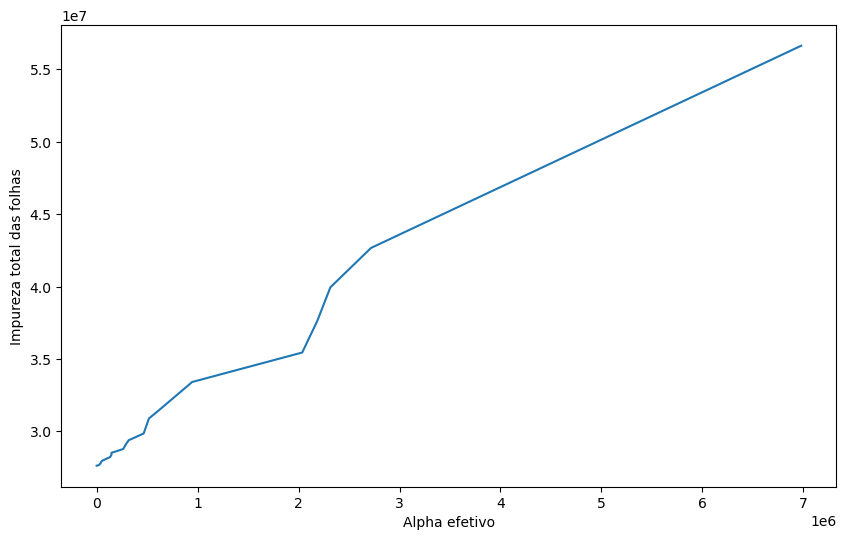

In [32]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [34]:
clfs = [] # treinando as árvores com seus resptivos alphas e guardando na lista clfs

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_test, y_test)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

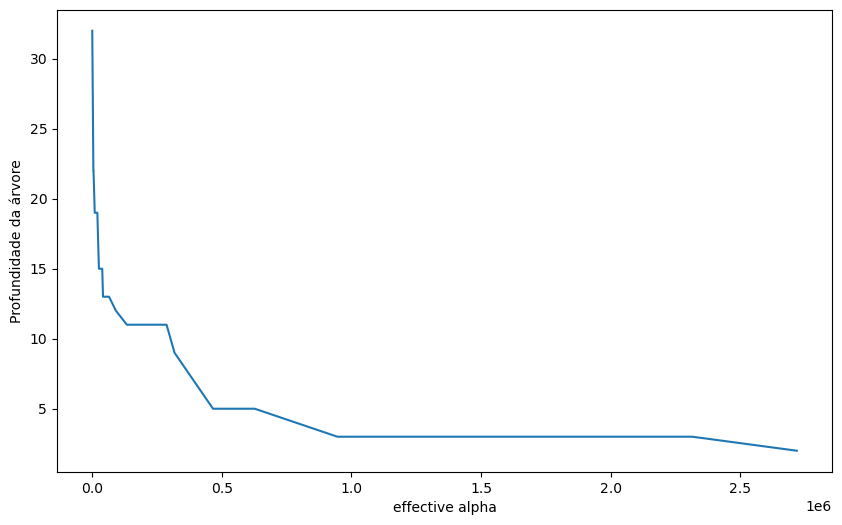

In [35]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [36]:
# calculando o MSE da base de test
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

In [38]:
df2 = pd.DataFrame(zip( test_scores), columns = ["test"])
df2 = df2.assign(alpha = path.ccp_alphas)
df2

,test,alpha
0,6.482840e+06,0.000000e+00
1,7.733657e+06,4.337392e+03
2,7.866157e+06,4.824020e+03
3,9.229586e+06,9.572667e+03
4,1.141987e+07,1.966180e+04
5,1.267151e+07,2.568015e+04
6,1.293985e+07,2.900083e+04
7,1.389914e+07,3.849325e+04
8,1.454850e+07,4.154319e+04
9,1.507683e+07,4.794604e+04


In [44]:
# identificando o menor valor de mse para usar como alpha da arvore de regressão
df2.test.min()  
#   test                alpha
#0	6.482840e+06	0.000000e+00

6482840.405959705

In [52]:
# treinando a árvore com o alpha do menor valor de MSE

tree1 = DecisionTreeRegressor(ccp_alpha=0, max_depth = 5) # aplicando o menor alpha na árvore

tree1.fit(X_test, y_test)

DecisionTreeRegressor(ccp_alpha=0, max_depth=5)

In [53]:
r2 = tree1.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(tree1.get_depth(),r2).replace(".",","))

#calculando o R-quadrado da árvore com o alpha escolhido

O R-quadrado da árvore com profundidade=5 é: 0,34


- Após realizar uma árvore de regressão de pofundidade ``5``, calculando o mse e usando o seu respectivo alpha ``0``, o R-quadrado subiu para ``0,34`` o que é o maior até agora. 
- Infelizmente não consegui verificar outros parâmetros como o R-quadrado ajustado ou o AIC para identificar se de fato o modelo está melhor.